In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import os
import random

In [52]:
df = pd.read_csv("../diaries_transactions_all.csv");
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483949 entries, 0 to 483948
Data columns (total 58 columns):
hh_ids                        483949 non-null object
unique_hhs                    298 non-null float64
first_trx_date_hh             483949 non-null object
last_trx_date_hh              483949 non-null object
tot_hh_daysofobs              483949 non-null int64
tot_hh_monthsofobs            483949 non-null int64
interview_designation         483681 non-null object
int_date                      483949 non-null object
int_month                     483949 non-null int64
int_year                      483949 non-null int64
int_yr_mo                     483949 non-null object
first_int_date                483949 non-null object
account_ids                   483949 non-null object
unique_accnts                 9546 non-null float64
m_ids_owner                   483949 non-null object
unique_hm_owner               670 non-null float64
account_bsheet_desig          77070 non-null objec

In [53]:
frmlln = df[ df['trx_type_code'] == 2762]


In [54]:
frmlln.shape



(324, 58)

In [55]:
len(frmlln['account_ids'].unique())

33

In [56]:
frmlln.describe()

,unique_hhs,tot_hh_daysofobs,tot_hh_monthsofobs,int_month,int_year,unique_accnts,unique_hm_owner,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,trx_month,trx_year,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_type_code,trx_fee,trx_mode_code,trx_place_incommunity,trx_distance_km,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
count,0.0,324.000000,324.000000,324.000000,324.000000,33.0,0.0,324.000000,324.000000,3.240000e+02,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.0,324.000000,324.000000,243.000000,243.000000,324.000000,324.000000,324.0,1.000,1.0,324.000000
mean,NaN,387.435185,12.870370,7.006173,2012.867284,1.0,NaN,279.891975,9.033951,7.138116e+16,6.895062,2012.780864,11.438272,213.200617,6.944444,131.006173,4.098765,2762.0,0.027778,8.126543,0.353909,13.764997,24166.111111,284.307190,0.0,882.353,75000.0,7.351745
std,NaN,24.133891,0.880746,3.227200,0.339792,0.0,NaN,93.209196,3.249495,2.077397e+16,3.282580,0.414301,6.408626,116.529457,4.020459,110.006304,3.707928,0.0,0.164590,7.231213,0.479168,65.126128,78049.651305,918.231196,0.0,NaN,NaN,4.018257
min,NaN,356.000000,12.000000,1.000000,2012.000000,1.0,NaN,34.000000,1.000000,3.413871e+16,1.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2762.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,882.353,75000.0,0.000000
25%,NaN,374.000000,12.000000,5.000000,2013.000000,1.0,NaN,200.000000,6.000000,5.713783e+16,4.000000,2013.000000,6.000000,119.000000,4.000000,37.250000,1.000000,2762.0,0.000000,1.000000,0.000000,0.000000,2000.000000,23.529410,0.0,882.353,75000.0,4.103448
50%,NaN,382.000000,13.000000,8.000000,2013.000000,1.0,NaN,288.000000,9.000000,6.313526e+16,7.000000,2013.000000,11.000000,214.000000,7.000000,112.000000,3.000000,2762.0,0.000000,3.000000,0.000000,2.281859,6000.000000,70.588230,0.0,882.353,75000.0,7.379310
75%,NaN,398.000000,13.000000,10.000000,2013.000000,1.0,NaN,365.750000,12.000000,8.413832e+16,10.000000,2013.000000,17.000000,314.000000,10.000000,211.750000,7.000000,2762.0,0.000000,16.000000,1.000000,8.085859,10250.000000,120.588200,0.0,882.353,75000.0,10.827590
max,NaN,445.000000,15.000000,12.000000,2013.000000,1.0,NaN,385.000000,13.000000,1.121385e+17,12.000000,2013.000000,26.000000,413.000000,14.000000,385.000000,13.000000,2762.0,1.000000,19.000000,1.000000,421.598400,700000.000000,8235.294000,0.0,882.353,75000.0,14.241380


In [57]:
frmlln.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
70,KMAKE06,NaN,02oct2012,30sep2013,363,12,06=Cleaning interview,25sep2013,9,2013,2013_09,04sep2012,63136740549700000,NaN,63134425702500000,NaN,Liability,Start,Formal,NaN,22apr2013,24sep2013,155,5,63138432890300000,63134425702500000,22apr2013,4,2013,2013_04,21.0,202,6,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2762,Consumer/ personal loan (not payday loan),1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,16800.0,197.64710,0,NaN,NaN,NaN,6.965517
477,KMOMM01,NaN,05sep2012,25sep2013,385,13,03=Q3,05sep2012,9,2012,2012_09,22aug2012,57134685477600000,1.0,57134322015900000,NaN,Liability,Start,Formal,NaN,05sep2012,25sep2013,385,13,57138119337500000,57134322015900000,05sep2012,9,2012,2012_09,1.0,0,0,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2762,Consumer/ personal loan (not payday loan),1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,700000.0,8235.29400,0,NaN,NaN,NaN,0.000000
570,KNBOK36,NaN,01nov2012,23oct2013,356,12,05=Module,23oct2013,10,2013,2013_10,19dec2012,50135823749200000,NaN,79134985767500000,NaN,Liability,NaN,Formal,NaN,01dec2012,23oct2013,326,11,51140447560600000,79134985767500000,23oct2013,10,2013,2013_10,18.0,356,12,326,11,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2762,Consumer/ personal loan (not payday loan),DECREASE--Unexplained balance adjustment,NaN,0.0,Decrease,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,2937.0,34.55294,0,NaN,NaN,NaN,12.275860
1112,KMOMM10,NaN,05sep2012,04nov2013,425,14,04=Diaries Interview,22may2013,5,2013,2013_05,05sep2012,57136557858500000,NaN,57134320447800000,NaN,Liability,NaN,Formal,NaN,08apr2013,25sep2013,170,5,57138509158900000,57134320447800000,16may2013,5,2013,2013_05,13.0,253,8,38,1,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2762,Consumer/ personal loan (not payday loan),5. Interest accruing,NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,1190.0,14.00000,0,NaN,NaN,NaN,8.724138
1158,KMOMB01,NaN,07sep2012,04oct2013,392,13,04=Diaries Interview,04oct2013,10,2013,2013_10,07sep2012,57134702809800000,NaN,57134339147100000,NaN,Liability,Close,Formal,NaN,20dec2012,04oct2013,288,9,57138087109800000,57134339147100000,04oct2013,10,2013,2013_10,19.0,392,13,288,9,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2762,Consumer/ personal loan (not payday loan),6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,3150.0,37.05882,0,NaN,NaN,NaN,13.517240


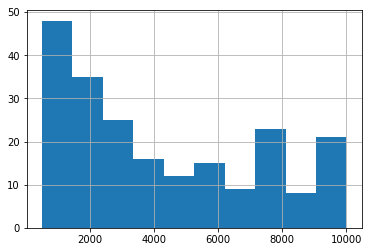

In [72]:
frmlln[((frmlln ["trx_value_kes"] >= 500) & (frmlln ["trx_value_kes"] <=10000))]["trx_value_kes"].hist()

148,041 KES

In [73]:
frmlln.describe()

,unique_hhs,tot_hh_daysofobs,tot_hh_monthsofobs,int_month,int_year,unique_accnts,unique_hm_owner,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,trx_month,trx_year,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_type_code,trx_fee,trx_mode_code,trx_place_incommunity,trx_distance_km,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
count,0.0,324.000000,324.000000,324.000000,324.000000,33.0,0.0,324.000000,324.000000,3.240000e+02,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.0,324.000000,324.000000,243.000000,243.000000,324.000000,324.000000,324.0,1.000,1.0,324.000000
mean,NaN,387.435185,12.870370,7.006173,2012.867284,1.0,NaN,279.891975,9.033951,7.138116e+16,6.895062,2012.780864,11.438272,213.200617,6.944444,131.006173,4.098765,2762.0,0.027778,8.126543,0.353909,13.764997,24166.111111,284.307190,0.0,882.353,75000.0,7.351745
std,NaN,24.133891,0.880746,3.227200,0.339792,0.0,NaN,93.209196,3.249495,2.077397e+16,3.282580,0.414301,6.408626,116.529457,4.020459,110.006304,3.707928,0.0,0.164590,7.231213,0.479168,65.126128,78049.651305,918.231196,0.0,NaN,NaN,4.018257
min,NaN,356.000000,12.000000,1.000000,2012.000000,1.0,NaN,34.000000,1.000000,3.413871e+16,1.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2762.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,882.353,75000.0,0.000000
25%,NaN,374.000000,12.000000,5.000000,2013.000000,1.0,NaN,200.000000,6.000000,5.713783e+16,4.000000,2013.000000,6.000000,119.000000,4.000000,37.250000,1.000000,2762.0,0.000000,1.000000,0.000000,0.000000,2000.000000,23.529410,0.0,882.353,75000.0,4.103448
50%,NaN,382.000000,13.000000,8.000000,2013.000000,1.0,NaN,288.000000,9.000000,6.313526e+16,7.000000,2013.000000,11.000000,214.000000,7.000000,112.000000,3.000000,2762.0,0.000000,3.000000,0.000000,2.281859,6000.000000,70.588230,0.0,882.353,75000.0,7.379310
75%,NaN,398.000000,13.000000,10.000000,2013.000000,1.0,NaN,365.750000,12.000000,8.413832e+16,10.000000,2013.000000,17.000000,314.000000,10.000000,211.750000,7.000000,2762.0,0.000000,16.000000,1.000000,8.085859,10250.000000,120.588200,0.0,882.353,75000.0,10.827590
max,NaN,445.000000,15.000000,12.000000,2013.000000,1.0,NaN,385.000000,13.000000,1.121385e+17,12.000000,2013.000000,26.000000,413.000000,14.000000,385.000000,13.000000,2762.0,1.000000,19.000000,1.000000,421.598400,700000.000000,8235.294000,0.0,882.353,75000.0,14.241380


In [74]:
frmlln["trx_prx_purpose"].unique()

array(['1. Starting balance (today)',
       'DECREASE--Unexplained balance adjustment', '5. Interest accruing',
       '6. Closing Balance--End of last DQ', '3. Payments',
       '4. Any known fees', 'INCREASE--Unexplained balance adjustment',
       '2. New borrowing'], dtype=object)

In [75]:
len(frmlln[frmlln["trx_prx_purpose"]=="5. Interest accruing"]["account_ids"].unique())

8

In [76]:
frmlln['account_ids'].nunique()

33

In [77]:
print(frmlln['account_ids'].nunique())

33


In [78]:
acc = random.choice(frmlln["account_ids"].unique())
print(acc)

61134798041100000


In [79]:
history = frmlln[frmlln["account_ids"]==acc]
history.sort_values("trx_stdtime_days_acc", inplace=True)

In [80]:
frmlln.columns

Index(['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year', 'trx_yr_mo', 'trx_dq_round',
       'trx_stdtime_days_hh', 'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc',
       'trx_stdtime_mnths_acc', 'trx_class_code', 'trx_class_desc',
       'trx_family_code', 'trx_family_desc', 'trx_type_code', 'trx_type_desc',
       'trx_prx_purpose', 'trx_prx_purpose_fd', 'trx_fee',
       'trx_bsheet_direction', 'trx_mode_code', 'trx_mode_desc',
       'trx_place_incommunity', 'trx_distance_km', 'trx_outlet'

In [81]:
pers= frmlln[(frmlln ['trx_type_desc']) == ('Consumer/ personal loan (not payday loan)'  )]

In [82]:
pers.shape

(324, 58)

In [83]:
len(pers['account_ids'].unique())

33

In [84]:
print(pd.set_option('display.max_columns',200))

None


In [88]:
unique_ids = pers.loc[pers['unique_accnts']==1].account_ids
len(unique_ids)

33

In [89]:
print(unique_ids)

477        57134685477600000
1743       57136557858500000
3025       84136886562100000
5648       61134945286800000
5992       63134804220400000
6401       63134734844700000
6443       59134942576600000
6551       61134798041100000
8073       59136998025000000
8312       61134797983800000
15219      50136756070500000
16043      63134752889200000
20214      89136617005000000
20425      61134830133700000
21019      79134944405200000
23103      63134734786300000
25521      50135823749200000
146280     63136075164500000
163620     89138130387400000
363401     89138130900700000
379932     63136740549700000
414566     63136808803000000
425664     57134702809800000
435259    105137049848100000
435311     84136514094000000
437904     50137023475700000
438446     61135352095000000
453135     62135858405800000
458409     57135920565300000
463692     61134822448900000
464457     57135840612400000
470360     57134683686000000
476053     57136539616900000
Name: account_ids, dtype: object


In [92]:
random.seed(1)
a = random.choice(list(unique_ids))
a

'59136998025000000'

In [95]:
loan = pers.loc[pers['account_ids']==a]
loan.shape

(8, 58)

In [96]:
loan = pers.loc[pers['account_ids']==a]
loan.shape
loan.sort_values("trx_stdtime_days_acc", inplace=True)

In [97]:
loan = pers.loc[pers['account_ids']==a]
loan.shape
loan.sort_values("trx_stdtime_days_acc", inplace=True)

for index, row in loan.iterrows():
    if loan.loc[index,"trx_bsheet_direction"]=="Increase":
        loan.at[index,"trx_val_dir"] = loan.loc[index,"trx_value_kes"]
    elif loan.loc[index,"trx_bsheet_direction"]=="Decrease":
        loan.at[index,"trx_val_dir"] = -loan.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))
loan[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

loan.insert(33,"evol",np.zeros(loan.shape[0]))
s=0
for index,row in loan.iterrows():
    s+=loan.loc[index,"trx_val_dir"]
    loan.at[index,"evol"]=s
loan.plot(x="trx_stdtime_days_acc",y="evol")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)

Error neither increase nor decrease at index4020


In [98]:
loan[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
6165,0,842.0,5. Interest accruing,NaN,Increase,842.0
8073,0,1400.0,4. Any known fees,NaN,Increase,1400.0
443082,0,10000.0,2. New borrowing,Inflow,Increase,10000.0
166077,58,2000.0,3. Payments,Outflow,Decrease,-2000.0
442965,58,2000.0,3. Payments,Outflow,Decrease,-2000.0
443161,87,2000.0,3. Payments,Outflow,Decrease,-2000.0
443034,115,2000.0,3. Payments,Outflow,Decrease,-2000.0
4020,122,4242.0,6. Closing Balance--End of last DQ,NaN,NaN,NaN


In [108]:
loan.insert(33,"evol",np.zeros(loan.shape[0]))

ValueError: cannot insert evol, already exists

In [109]:
s=0
for index,row in loan.iterrows():
    s+=loan.loc[index,"trx_val_dir"]
    loan.at[index,"evol"]=s
loan.plot(x="trx_stdtime_days_acc",y="evol")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)


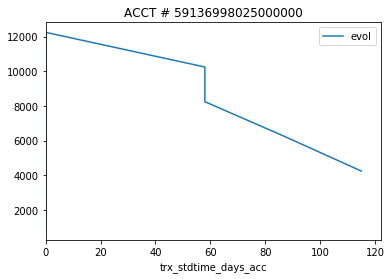

In [110]:
loan.plot(x="trx_stdtime_days_acc",y="evol")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)

In [111]:
477        57134685477600000
1743       57136557858500000
3025       84136886562100000
5648       61134945286800000
5992       63134804220400000
6401       63134734844700000
6443       59134942576600000
6551       61134798041100000
8073       59136998025000000
8312       61134797983800000
15219      50136756070500000
16043      63134752889200000
20214      89136617005000000
20425      61134830133700000
21019      79134944405200000
23103      63134734786300000
25521      50135823749200000
146280     63136075164500000
163620     89138130387400000
363401     89138130900700000
379932     63136740549700000
414566     63136808803000000
425664     57134702809800000
435259    105137049848100000
435311     84136514094000000
437904     50137023475700000
438446     61135352095000000
453135     62135858405800000
458409     57135920565300000
463692     61134822448900000
464457     57135840612400000
470360     57134683686000000
476053     57136539616900000

SyntaxError: invalid syntax (<ipython-input-111-ee42d525ba6e>, line 1)

Error neither increase nor decrease at index3988


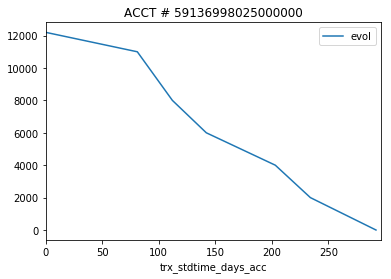

In [113]:
loan = pers.loc[pers['account_ids']== '57135920565300000']
loan.shape
loan.sort_values("trx_stdtime_days_acc", inplace=True)

for index, row in loan.iterrows():
    if loan.loc[index,"trx_bsheet_direction"]=="Increase":
        loan.at[index,"trx_val_dir"] = loan.loc[index,"trx_value_kes"]
    elif loan.loc[index,"trx_bsheet_direction"]=="Decrease":
        loan.at[index,"trx_val_dir"] = -loan.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))
loan[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

loan.insert(33,"evol",np.zeros(loan.shape[0]))
s=0
for index,row in loan.iterrows():
    s+=loan.loc[index,"trx_val_dir"]
    loan.at[index,"evol"]=s
loan.plot(x="trx_stdtime_days_acc",y="evol")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)

Error neither increase nor decrease at index13630


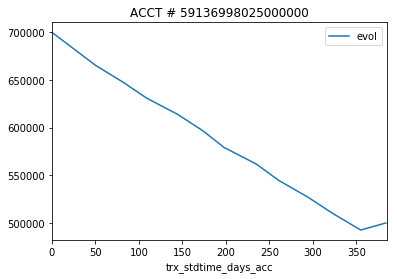

In [114]:
loan = pers.loc[pers['account_ids']== '57134685477600000']
loan.shape
loan.sort_values("trx_stdtime_days_acc", inplace=True)

for index, row in loan.iterrows():
    if loan.loc[index,"trx_bsheet_direction"]=="Increase":
        loan.at[index,"trx_val_dir"] = loan.loc[index,"trx_value_kes"]
    elif loan.loc[index,"trx_bsheet_direction"]=="Decrease":
        loan.at[index,"trx_val_dir"] = -loan.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))
loan[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

loan.insert(33,"evol",np.zeros(loan.shape[0]))
s=0
for index,row in loan.iterrows():
    s+=loan.loc[index,"trx_val_dir"]
    loan.at[index,"evol"]=s
loan.plot(x="trx_stdtime_days_acc",y="evol")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)

Error neither increase nor decrease at index15772


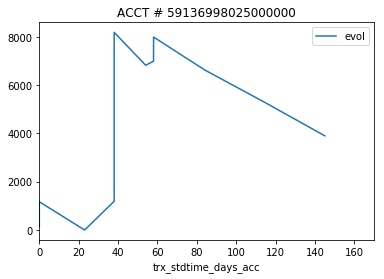

In [115]:
loan = pers.loc[pers['account_ids']== '57136557858500000']
loan.shape
loan.sort_values("trx_stdtime_days_acc", inplace=True)

for index, row in loan.iterrows():
    if loan.loc[index,"trx_bsheet_direction"]=="Increase":
        loan.at[index,"trx_val_dir"] = loan.loc[index,"trx_value_kes"]
    elif loan.loc[index,"trx_bsheet_direction"]=="Decrease":
        loan.at[index,"trx_val_dir"] = -loan.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))
loan[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

loan.insert(33,"evol",np.zeros(loan.shape[0]))
s=0
for index,row in loan.iterrows():
    s+=loan.loc[index,"trx_val_dir"]
    loan.at[index,"evol"]=s
loan.plot(x="trx_stdtime_days_acc",y="evol")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)

Error neither increase nor decrease at index2952


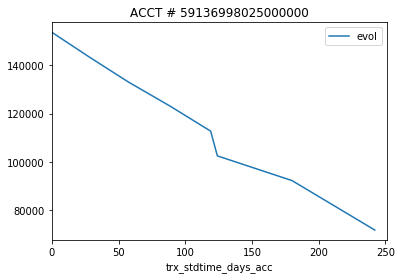

In [116]:
loan = pers.loc[pers['account_ids']== '84136886562100000']
loan.shape
loan.sort_values("trx_stdtime_days_acc", inplace=True)

for index, row in loan.iterrows():
    if loan.loc[index,"trx_bsheet_direction"]=="Increase":
        loan.at[index,"trx_val_dir"] = loan.loc[index,"trx_value_kes"]
    elif loan.loc[index,"trx_bsheet_direction"]=="Decrease":
        loan.at[index,"trx_val_dir"] = -loan.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))
loan[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

loan.insert(33,"evol",np.zeros(loan.shape[0]))
s=0
for index,row in loan.iterrows():
    s+=loan.loc[index,"trx_val_dir"]
    loan.at[index,"evol"]=s
loan.plot(x="trx_stdtime_days_acc",y="evol")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)

Error neither increase nor decrease at index21131


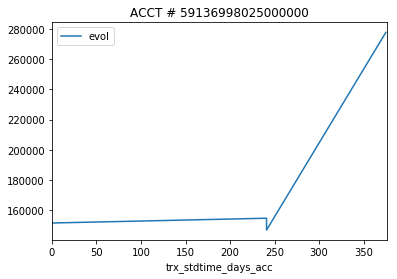

In [117]:
loan = pers.loc[pers['account_ids']== '61134945286800000']
loan.shape
loan.sort_values("trx_stdtime_days_acc", inplace=True)

for index, row in loan.iterrows():
    if loan.loc[index,"trx_bsheet_direction"]=="Increase":
        loan.at[index,"trx_val_dir"] = loan.loc[index,"trx_value_kes"]
    elif loan.loc[index,"trx_bsheet_direction"]=="Decrease":
        loan.at[index,"trx_val_dir"] = -loan.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))
loan[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

loan.insert(33,"evol",np.zeros(loan.shape[0]))
s=0
for index,row in loan.iterrows():
    s+=loan.loc[index,"trx_val_dir"]
    loan.at[index,"evol"]=s
loan.plot(x="trx_stdtime_days_acc",y="evol")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)